<a href="https://colab.research.google.com/github/rgaguiar/data_science_Py/blob/main/trabalho_seminario_pdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install --upgrade imutils

In [1]:
# artigo de referência
# https://www.askpython.com/python/examples/opencv-credit-card-reader

from imutils import contours
import numpy as np
import argparse
import imutils
import cv2

from matplotlib import pyplot as plt

In [2]:
FIRST_NUMBER = {
    "3": "American Express",
    "4": "Visa",
    "5": "MasterCard",
    "6": "Discover Card"}

In [3]:
ref = cv2.imread('/content/ocr_a_reference.png')
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
ref = cv2.threshold(ref, 10, 255, cv2.THRESH_BINARY_INV)[1]

In [4]:
ref

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

(-0.5, 799.5, 125.5, -0.5)

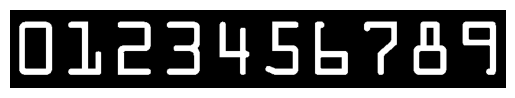

In [5]:
plt.imshow(ref, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

In [6]:
refCnts = cv2.findContours(ref.copy(), cv2.RETR_EXTERNAL,	cv2.CHAIN_APPROX_SIMPLE)
refCnts = imutils.grab_contours(refCnts)
refCnts = contours.sort_contours(refCnts, method="left-to-right")[0]
digits = {}

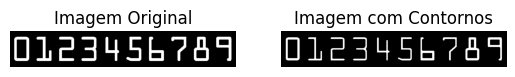

In [7]:
output = ref.copy()

# contornos na imagem de saída
cv2.drawContours(output, refCnts, -1, (0, 255, 0), 2)

# imagens BGR para RGB
ref_rgb = cv2.cvtColor(ref, cv2.COLOR_BGR2RGB)
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# imagem original e a imagem com contornos
plt.subplot(1, 2, 1)
plt.imshow(ref_rgb, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_rgb)
plt.title('Imagem com Contornos')
plt.axis('off')

plt.show()

In [9]:
for (i, c) in enumerate(refCnts):
    (x, y, w, h) = cv2.boundingRect(c)
    roi = ref[y:y + h, x:x + w]
    roi = cv2.resize(roi, (57, 88))
    digits[i] = roi

rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

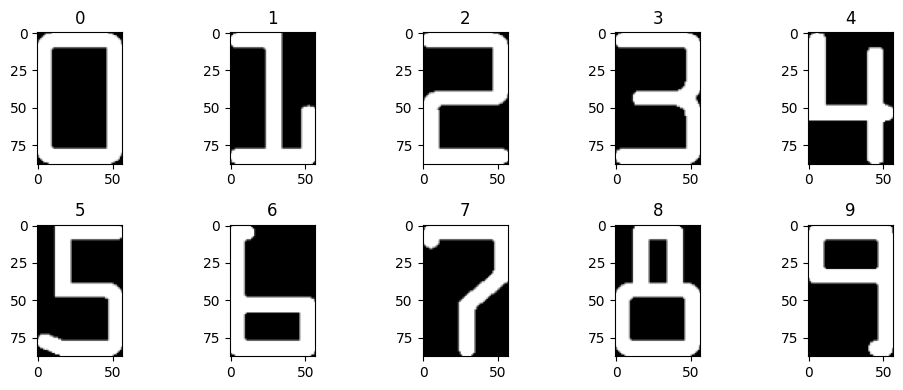

In [23]:
num_linhas = 2
num_colunas = 5

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 4))
for i, (titulo, imagem) in enumerate(digits.items()):
    # Calcula a posição do subplot
    linha = i // num_colunas
    coluna = i % num_colunas

    # Exibe a imagem no subplot correspondente
    axs[linha, coluna].imshow(imagem, cmap='gray')
    axs[linha, coluna].set_title(titulo)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()


In [ ]:
image = cv2.imread('/content/MicrosoftTeams-image (3).png')
image = imutils.resize(image, width=300)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# morfologia
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)

# filtro de sobel
gradX = cv2.Sobel(tophat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = (255 * ((gradX - minVal) / (maxVal - minVal)))
gradX = gradX.astype("uint8")

# threshold otsu
gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKernel)
thresh = cv2.threshold(gradX, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sqKernel)

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
locs = []

for (i, c) in enumerate(cnts):
    (x, y, w, h) = cv2.boundingRect(c)
    ar = w / float(h)
    if ar > 2.5 and ar < 4.0:
        if (w > 40 and w < 55) and (h > 10 and h < 20):
            locs.append((x, y, w, h))

locs = sorted(locs, key=lambda x:x[0])
output = []

(-0.5, 299.5, 188.5, -0.5)

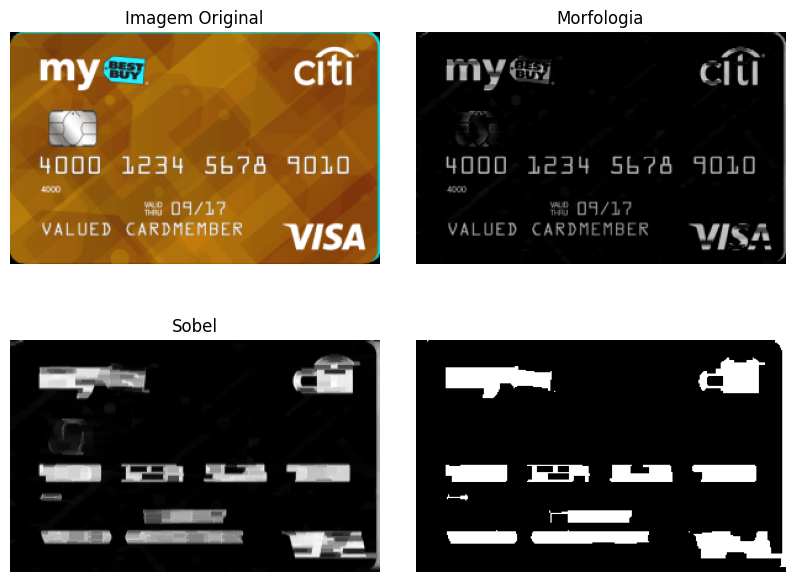

In [ ]:
plt.figure(figsize=(10, 8))
plt.subplots_adjust(hspace=0., wspace=0.1)

plt.subplot(221)
plt.imshow(image)
plt.title("Imagem Original")
plt.axis('off')

plt.subplot(222)
plt.imshow(tophat, cmap='gray', vmin=0, vmax=255)
plt.title("Morfologia")
plt.axis('off')

plt.subplot(223)
plt.imshow(gradX, cmap='gray', vmin=0, vmax=255)
plt.title("Sobel")
plt.axis('off')

plt.subplot(224)
plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)
plt.title("")
plt.axis('off')

### Imagem OCR

In [ ]:
# card = cv2.imread('/content/Master-Card-Black.jpg')
# card = imutils.resize(card, width=300)
# card_grey = cv2.cvtColor(card, cv2.COLOR_BGR2GRAY)

In [ ]:
# plt.imshow(card, vmin=0, vmax=255)

In [ ]:
for (i, (gX, gY, gW, gH)) in enumerate(locs):
    groupOutput = []
    group = gray[gY - 5:gY + gH + 5, gX - 5:gX + gW + 5]
    group = cv2.threshold(group, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    digitCnts = cv2.findContours(group.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    digitCnts = imutils.grab_contours(digitCnts)
    digitCnts = contours.sort_contours(digitCnts, method="left-to-right")[0]
    for c in digitCnts:
        (x, y, w, h) = cv2.boundingRect(c)
        roi = group[y:y + h, x:x + w]
        roi = cv2.resize(roi, (57, 88))
        scores = []
        for (digit, digitROI) in digits.items():
            result = cv2.matchTemplate(roi, digitROI, cv2.TM_CCOEFF)
            (_, score, _, _) = cv2.minMaxLoc(result)
            scores.append(score)
        groupOutput.append(str(np.argmax(scores)))
    cv2.rectangle(image, (gX - 5, gY - 5), (gX + gW + 5, gY + gH + 5), (0, 0, 255), 2)
    cv2.putText(image, "".join(groupOutput), (gX, gY - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 0, 255), 2)
    output.extend(groupOutput)

Credit Card Type: Visa
Credit Card #: 4000123456789010


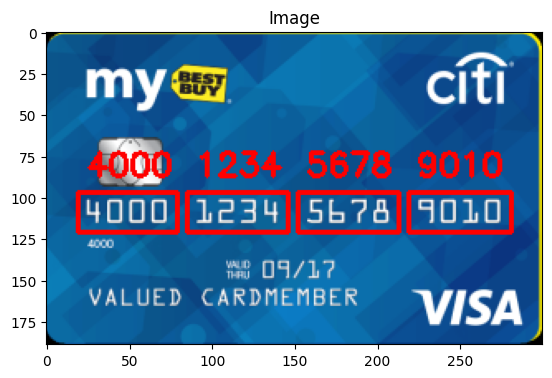

In [ ]:
print("Credit Card Type: {}".format(FIRST_NUMBER[output[0]]))
print("Credit Card #: {}".format("".join(output)))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image'); plt.show()